<a href="https://colab.research.google.com/github/carolinabasile/ProblemSet1_MachineLearning/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Set 1 - Machine Learning - UNLP

## Obtención y limpieza de los datos



In [1]:
# Importamos las librerías necesarias
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Armamos una lista para almacenar todos los datos
data = []

# Base URL de las páginas
base_url = 'https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_{}.html'

# Iteramos sobre las 10 páginas
for i in range(1, 11):

    # Construimos la URL de la página actual
    url = base_url.format(i)

    # Enviamos solicitud HTTP
    response = requests.get(url)
    print(f"Scraping página {i}: {response}")  # Confirmar que la solicitud es exitosa (<Response [200]>)

    # Parsear el contenido HTML
    soup = BeautifulSoup(response.content, 'html.parser')

    # Encontrar la tabla en la página
    table = soup.find('table')

    # Extraemos encabezados (solo en la primera iteración)
    if i == 1:  # Tomar encabezados solo de la primera página
        headers = []
        for header in table.find_all('th'):
            headers.append(header.text.strip())

    # Extraemos filas de datos
    for row in table.find_all('tr'):
        row_data = []
        for cell in row.find_all('td'):
            row_data.append(cell.text.strip())
        if row_data:  # Agregar solo filas con datos
            data.append(row_data)

# Convertimos los datos consolidados en un DataFrame
df = pd.DataFrame(data, columns=headers)

df

Scraping página 1: <Response [200]>
Scraping página 2: <Response [200]>
Scraping página 3: <Response [200]>
Scraping página 4: <Response [200]>
Scraping página 5: <Response [200]>
Scraping página 6: <Response [200]>
Scraping página 7: <Response [200]>
Scraping página 8: <Response [200]>
Scraping página 9: <Response [200]>
Scraping página 10: <Response [200]>


,,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,1,4514331,1,2,1,BOGOTA,1,2,0,29,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,2,4514331,1,1,1,BOGOTA,1,2,1,36,...,NA,NA,NA,8404.3203125,NA,NA,NA,NA,1620833.25,8404.3203125
2,3,4514332,1,4,1,BOGOTA,1,2,1,4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,4,4514332,1,3,1,BOGOTA,1,2,1,7,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,5,4514332,1,1,1,BOGOTA,1,2,0,32,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32172,3213,4804454,1,2,1,BOGOTA,12,2,0,24,...,NA,NA,NA,3345.5556640625,NA,NA,NA,NA,1003666.6875,3345.5556640625
32173,3214,4804455,1,1,1,BOGOTA,12,3,0,36,...,5e+05,NA,NA,25958.333984375,NA,NA,NA,NA,6675000,25958.333984375
32174,3215,4804455,1,2,1,BOGOTA,12,3,1,41,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
32175,3216,4804455,1,3,1,BOGOTA,12,3,1,8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [60]:
# Obtengo el nombre de todas las variables disponibles
variables = df.columns.tolist()

print(variables)

# Restringimos a individuos empleados mayores de 18 años (HAY QUE REVISAR SI P6240 ES LA CORRECTA)
df_limpio = df[(df['age'].astype(float) > 18) & (df['ocu'] == '1')]

print(f"Número de registros después del filtro (empleados mayores de 18 años): {len(df_limpio)}")

['', 'directorio', 'secuencia_p', 'orden', 'clase', 'dominio', 'mes', 'estrato1', 'sex', 'age', 'p6050', 'p6090', 'p6100', 'p6210', 'p6210s1', 'p6240', 'oficio', 'p6426', 'relab', 'p6500', 'p6510', 'p6510s1', 'p6510s2', 'p6545', 'p6545s1', 'p6545s2', 'p6580', 'p6580s1', 'p6580s2', 'p6585s1', 'p6585s1a1', 'p6585s1a2', 'p6585s2', 'p6585s2a1', 'p6585s2a2', 'p6585s3', 'p6585s3a1', 'p6585s3a2', 'p6585s4', 'p6585s4a1', 'p6585s4a2', 'p6590', 'p6590s1', 'p6600', 'p6600s1', 'p6610', 'p6610s1', 'p6620', 'p6620s1', 'p6630s1', 'p6630s1a1', 'p6630s2', 'p6630s2a1', 'p6630s3', 'p6630s3a1', 'p6630s4', 'p6630s4a1', 'p6630s6', 'p6630s6a1', 'p6750', 'p6760', 'p550', 'hoursWorkUsual', 'p6870', 'p6920', 'p7040', 'hoursWorkActualSecondJob', 'p7050', 'p7070', 'p7090', 'p7110', 'p7120', 'p7140s1', 'p7140s2', 'p7150', 'p7160', 'p7310', 'p7350', 'p7422', 'p7422s1', 'p7472', 'p7472s1', 'p7495', 'p7500s1', 'p7500s1a1', 'p7500s2', 'p7500s2a1', 'p7500s3', 'p7500s3a1', 'p7505', 'p7510s1', 'p7510s1a1', 'p7510s2', 'p7

In [61]:
# Primer approach para describir los datos

print("Información del DataFrame:")
print(df_limpio.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 16397 entries, 1 to 32174
Columns: 178 entries,  to y_total_m_ha
dtypes: object(178)
memory usage: 22.4+ MB
None


In [62]:
# Convierto algunas variables de interes a formato numerico
wage_hours_related_vars = ['p6500', 'p7070', 'hoursWorkUsual', 'hoursWorkActualSecondJob',
                           'y_salary_m', 'y_salary_m_hu', 'y_ingLab_m', 'y_ingLab_m_ha']

for col in wage_hours_related_vars:

    df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')
    print(f"{col} dtype: {df_limpio[col].dtype}")

# Calcular 'hour_wage' teniendo en cuenta los valores NaN
df_limpio['hour_wage'] = (df_limpio['p6500'].fillna(0) + df_limpio['p7070'].fillna(0)) / \
                                         ((df_limpio['hoursWorkActualSecondJob'].fillna(0) + df_limpio['hoursWorkUsual'].fillna(0))*4)

# Ajustar para casos donde el denominador es cero (para evitar divisiones por cero)
df_limpio.loc[(df_limpio['hoursWorkActualSecondJob'].fillna(0) + df_limpio['hoursWorkUsual'].fillna(0)) == 0, 'hour_wage'] = np.nan

# Ajustar para casos donde ambos, p6500 y p7070, son NaN
df_limpio.loc[df_limpio['p6500'].isna() & df_limpio['p7070'].isna(), 'hour_wage'] = np.nan

# Ajustar para casos donde ambos, hoursWorkActualSecondJob y hoursWorkUsual, son NaN
df_limpio.loc[df_limpio['hoursWorkActualSecondJob'].isna() & df_limpio['hoursWorkUsual'].isna(), 'hour_wage'] = np.nan

wage_hours_related_vars = wage_hours_related_vars + ['hour_wage']

p6500 dtype: float64
p7070 dtype: float64
hoursWorkUsual dtype: int64
hoursWorkActualSecondJob dtype: float64
y_salary_m dtype: float64
y_salary_m_hu dtype: float64
y_ingLab_m dtype: float64
y_ingLab_m_ha dtype: float64


<ipython-input-62-70fa2580cb31>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')
<ipython-input-62-70fa2580cb31>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['hour_wage'] = (df_limpio['p6500'].fillna(0) + df_limpio['p7070'].fillna(0)) / \


# Estudio de los datos

In [63]:
# Observo y comparo las variables del salario horario ya creadas con la que acabamos de crear

selected_columns = ['p6500', 'p7070', 'hoursWorkActualSecondJob', 'hoursWorkUsual', 'hour_wage',
                    'totalHoursWorked', 'y_salary_m', 'y_salary_m_hu', 'y_ingLab_m', 'y_ingLab_m_ha']

subset_df = df_limpio[selected_columns]
subset_df.head()

,p6500,p7070,hoursWorkActualSecondJob,hoursWorkUsual,hour_wage,totalHoursWorked,y_salary_m,y_salary_m_hu,y_ingLab_m,y_ingLab_m_ha
1,"1,300,000.00",0.00,NaN,45,"7,222.22",45,"1,300,000.00","6,740.74","1,620,833.25","8,404.32"
8,"1,200,000.00",0.00,NaN,48,"6,250.00",48,"1,200,000.00","5,833.33","1,378,973.38","6,703.34"
13,"737,717.00",0.00,NaN,56,"3,293.38",56,"737,717.00","3,073.82","883,357.00","3,680.65"
15,"700,000.00",0.00,NaN,40,"4,375.00",40,"700,000.00","4,083.33","700,000.00","4,083.33"
21,"1,700,000.00",0.00,NaN,48,"8,854.17",48,"1,700,000.00","8,263.89","1,941,500.12","9,437.85"


No resulta claro que variables se utilizaron para calcular el salario horario del empleo principal ni el salario horario total ya que se obtienen valores muy distintos a los que resultan de sumar los ingresos salariales de los empleos y dividirlos por las horas totales de trabajo.

In [64]:
# Estadisticos descriptivos para variables de interes
pd.set_option('display.float_format', '{:,.2f}'.format)

for col in wage_hours_related_vars:

  print("\nEstadísticas descriptivas para variables de interes:")
  print(df_limpio[col].describe())

  zero_count = (df_limpio[col] == 0).sum()
  na_count = df_limpio[col].isna().sum()
  print(f"Number of zeros in '{col}': {zero_count}")
  print(f"Number of missing values (NA) in '{col}': {na_count}")


Estadísticas descriptivas para variables de interes:
count       10,441.00
mean     1,467,828.51
std      2,123,494.84
min              0.00
25%        781,242.00
50%        880,000.00
75%      1,400,000.00
max     34,000,000.00
Name: p6500, dtype: float64
Number of zeros in 'p6500': 656
Number of missing values (NA) in 'p6500': 5956

Estadísticas descriptivas para variables de interes:
count       16,366.00
mean        19,294.83
std        219,840.45
min              0.00
25%              0.00
50%              0.00
75%              0.00
max     10,000,000.00
Name: p7070, dtype: float64
Number of zeros in 'p7070': 15913
Number of missing values (NA) in 'p7070': 31

Estadísticas descriptivas para variables de interes:
count   16,397.00
mean        47.05
std         15.50
min          1.00
25%         40.00
50%         48.00
75%         50.00
max        130.00
Name: hoursWorkUsual, dtype: float64
Number of zeros in 'hoursWorkUsual': 0
Number of missing values (NA) in 'hoursWorkUsual': 0

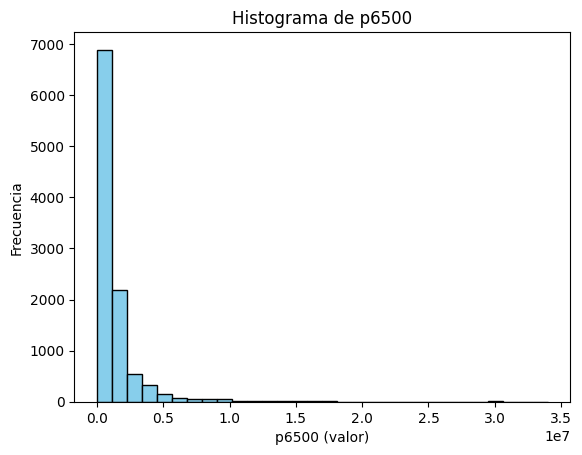

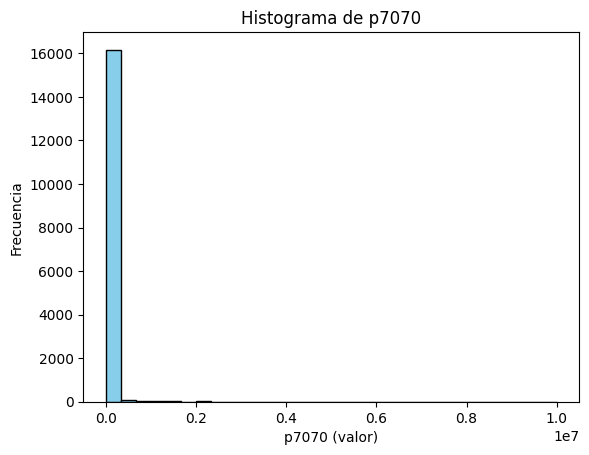

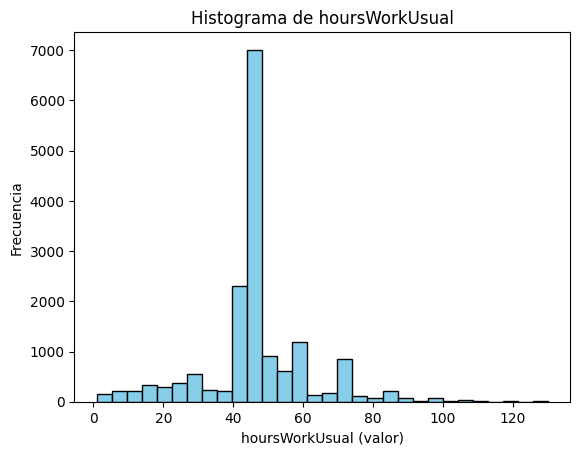

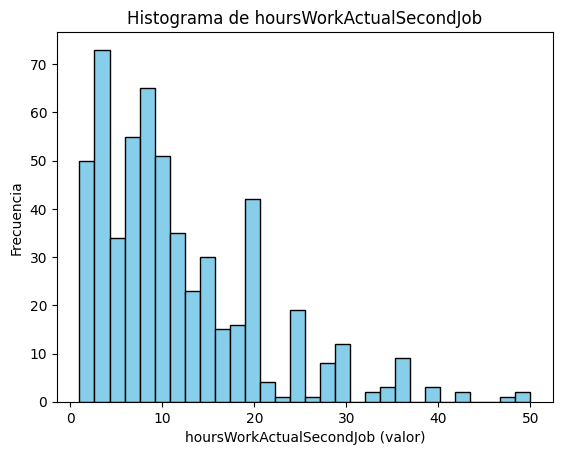

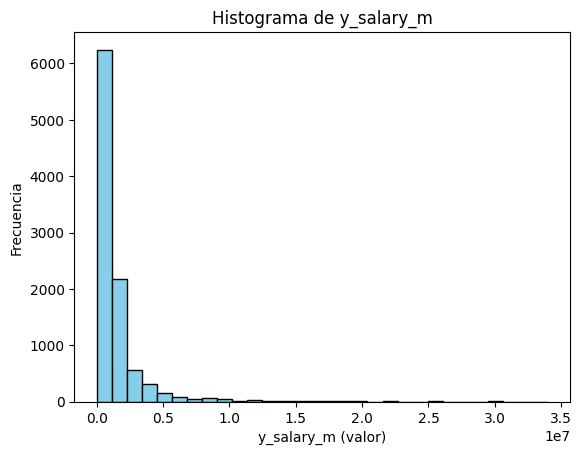

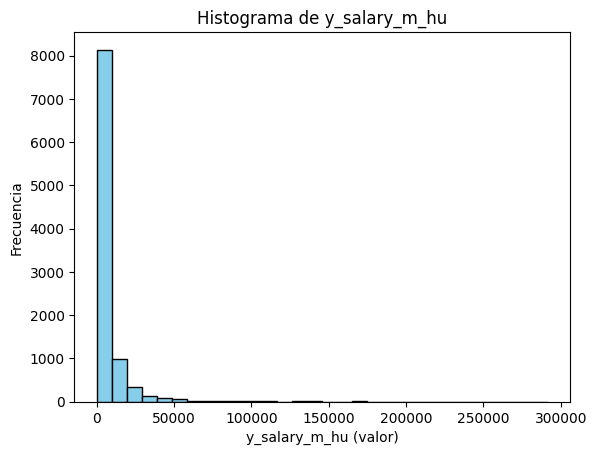

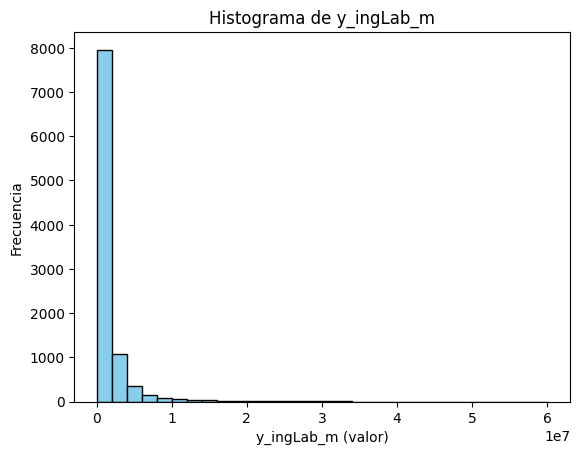

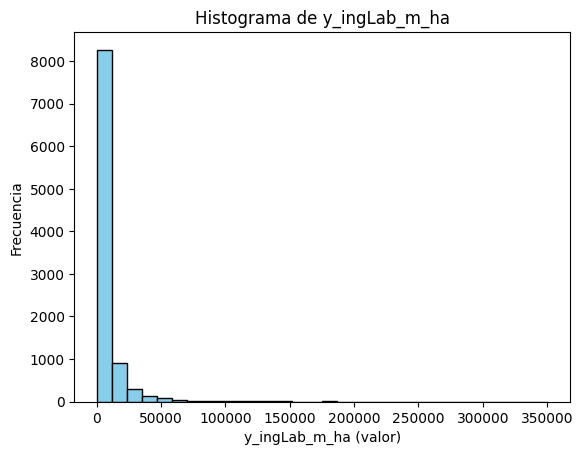

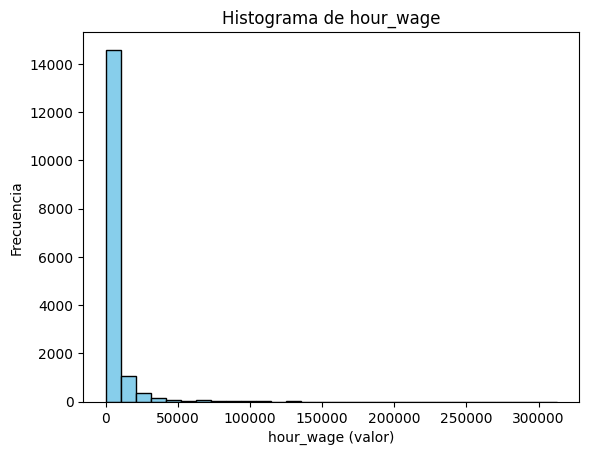

In [65]:
# Histogramas del salario horario

for col in wage_hours_related_vars:
    data = df_limpio[col].dropna()

    # Plot histogram of the variable
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(f'{col} (valor)')
    plt.ylabel('Frecuencia')
    plt.show()


Decidimos trabajar con la variable hour_wage, la cual se crea sumando el ingreso salarial de la ocupacion principal y, en caso de que exista, de la secundaria y dividiendolo por las horas de trabajo totales. Mas aun, se desea contar con casos de ingresos salariales nulos ya que estos puedene estar asociados a ingresos que provienen de otras fuentes.

Se excluyen las horas extra y los ingresos asociados a ellas por la potencial asociacion a factores ocacionales.

In [66]:
print("Unique values in 'maxEducLevel':")
print(df_limpio['maxEducLevel'].unique())

print("\nUnique values in 'sizeFirm':")
print(df_limpio['sizeFirm'].unique())

print("\nUnique values in 'relab':")
print(df_limpio['relab'].unique())

print("\nUnique values in 'informal':")
print(df_limpio['informal'].unique())

print("\nUnique values in 'sex':")
print(df_limpio['sex'].unique())

print("\nUnique values in 'oficio':")
print(df_limpio['oficio'].unique())

Unique values in 'maxEducLevel':
['6' '7' '4' '3' '5' '1' 'NA']

Unique values in 'sizeFirm':
['5' '3' '2' '4' '1']

Unique values in 'relab':
['2' '1' '4' '5' '3' '6' '9' '7' '8']

Unique values in 'informal':
['0' '1']

Unique values in 'sex':
['1' '0']

Unique values in 'oficio':
['39' '85' '45' '53' '13' '42' '33' '37' '57' '84' '55' '79' '56' '93'
 '21' '98' '32' '97' '54' '95' '58' '30' '19' '83' '51' '18' '41' '2' '44'
 '81' '3' '92' '6' '38' '77' '11' '15' '8' '61' '90' '87' '91' '16' '59'
 '36' '5' '99' '12' '80' '17' '34' '7' '70' '9' '4' '62' '75' '73' '50'
 '31' '52' '60' '94' '72' '35' '82' '89' '88' '40' '1' '74' '63' '43' '86'
 '14' '49' '20' '96' '76' '78']


In [67]:
# Convierto a las que van a ser mis variables independientes a tipo numérico, manejando posibles valores no numéricos (como 'NA') para poder calcular correlación

df_limpio['maxEducLevel'] = pd.to_numeric(df_limpio['maxEducLevel'], errors='coerce')  # Convierte a NaN si no es un número
df_limpio['p6426'] = pd.to_numeric(df_limpio['p6426'], errors='coerce')
df_limpio['age'] = pd.to_numeric(df_limpio['age'], errors='coerce')
df_limpio['sizeFirm'] = pd.to_numeric(df_limpio['sizeFirm'], errors='coerce')
df_limpio['relab'] = pd.to_numeric(df_limpio['relab'], errors='coerce')
df_limpio['informal'] = pd.to_numeric(df_limpio['informal'], errors='coerce')
df_limpio['sex'] = pd.to_numeric(df_limpio['sex'], errors='coerce')
df_limpio['oficio'] = pd.to_numeric(df_limpio['oficio'], errors='coerce')

<ipython-input-67-3d25d936a046>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['maxEducLevel'] = pd.to_numeric(df_limpio['maxEducLevel'], errors='coerce')  # Convierte a NaN si no es un número
<ipython-input-67-3d25d936a046>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['p6426'] = pd.to_numeric(df_limpio['p6426'], errors='coerce')
<ipython-input-67-3d25d936a046>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [68]:
# Elimino missings

df_limpio = df_limpio[["y_ingLab_m_ha", "age", "informal", "p6426", "relab", "sex", "sizeFirm","maxEducLevel", "oficio"]]
df_limpio = df_limpio.dropna()

In [ ]:
#SI LAS USAMOS COMO CATEGORICAS USAR ESTO PREVIO AL CHART

# One-hot encode the categorical variables
categorical_vars = ["oficio", "relab", "sizeFirm", "maxEducLevel"]
df_encoded = pd.get_dummies(df_limpio, columns=categorical_vars, drop_first=True)

# Define the updated set of variables for analysis
variables = ["y_ingLab_m_ha", "age", "informal", "p6426", "sex"] + \
            [col for col in df_encoded.columns if any(var in col for var in categorical_vars)]

subset = df_encoded[variables]

# Calculo y visualizo la matriz de correlación
corr_matrix = subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación")
plt.show()


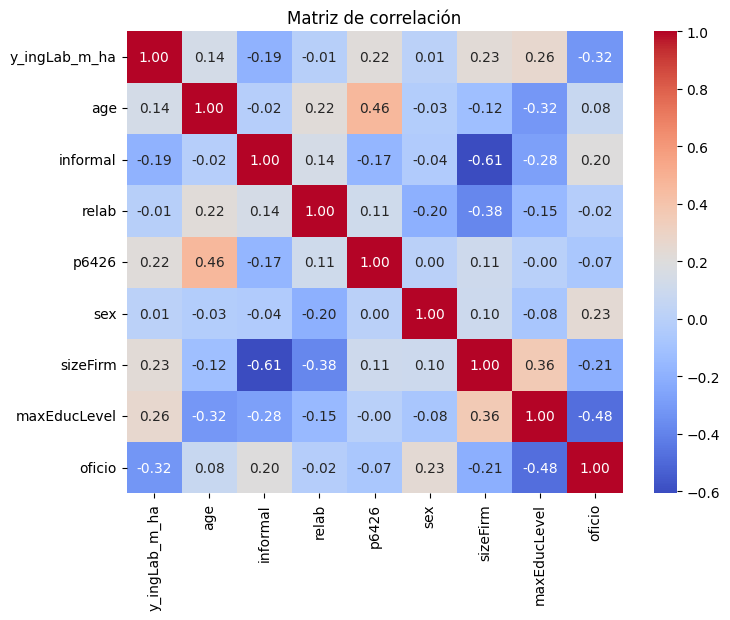

In [103]:
#age
#informal	=1 if informal (social security); =0 otherwise
#microEmpresa	=1 if 5 workers or less in firm; =0 otherwise; incluye cuenta propia
#ocu	=1 occupied; =0 otherwise
#p6426	¿cuanto tiempo lleva ... Trabajando en esta empresa, negocio, industria, oficina
#sex	=1 male, =0 female
#sizeFirm	size of the firm by categories

#p6020 sexo
#p6210 -- maximo nivel ed alcanzo
#dpto departamento / area maybe
#p6440 contrato laboral
#p6426 antiguedad
#rama2d -- actividad

# Defino un conjunto de variables para analizar
variables = ["y_ingLab_m_ha", "age", "informal", "relab",
             "p6426", "sex", "sizeFirm","maxEducLevel", "oficio"]

subset = df_limpio[variables]

# Calculo y visualizo la matriz de correlación
corr_matrix = subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación")
plt.show()

In [70]:
# Vuelvo a transformar a formato categórico a las variables que les corresponde
categorical_vars = ["informal", "relab", "sex", "sizeFirm", "maxEducLevel", "oficio"]

for var in categorical_vars:
    df_limpio[var] = df_limpio[var].astype('category')

print(df_limpio.dtypes)

y_ingLab_m_ha     float64
age                 int64
informal         category
p6426               int64
relab            category
sex              category
sizeFirm         category
maxEducLevel     category
oficio           category
dtype: object


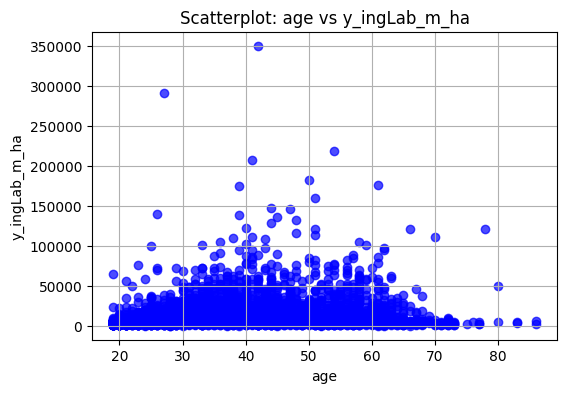

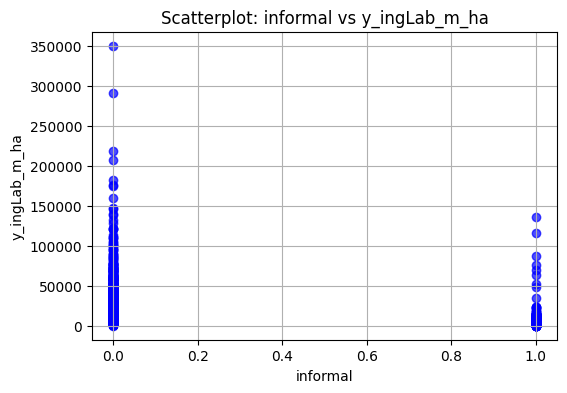

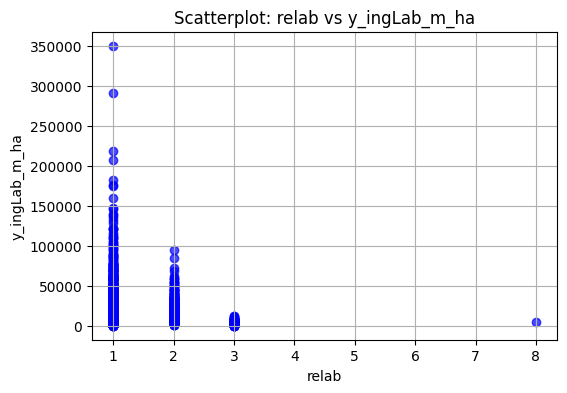

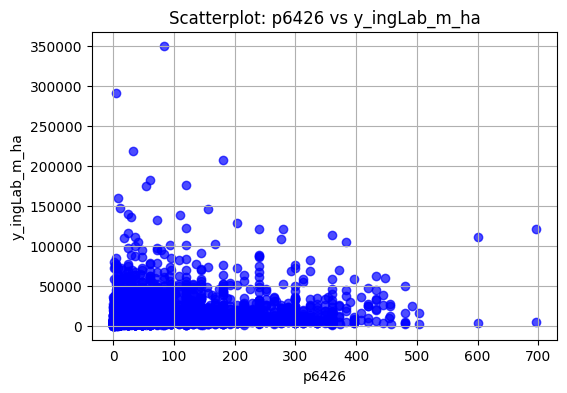

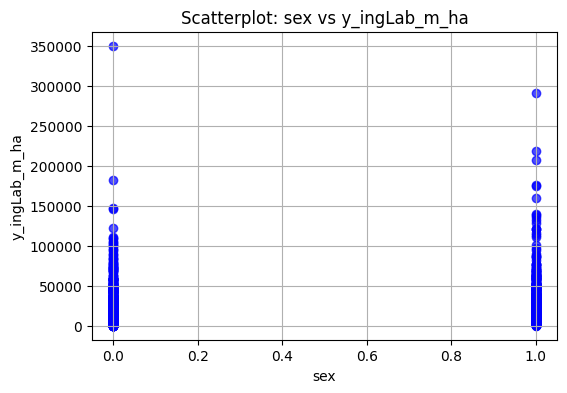

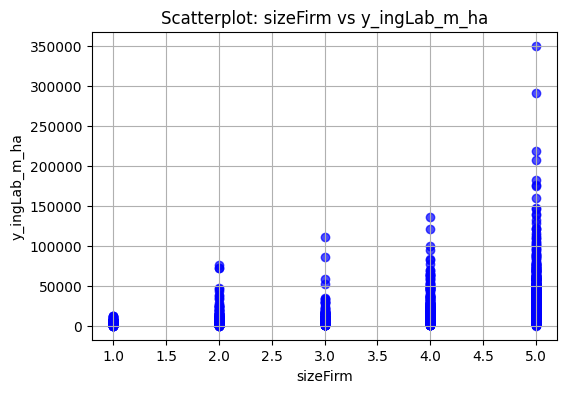

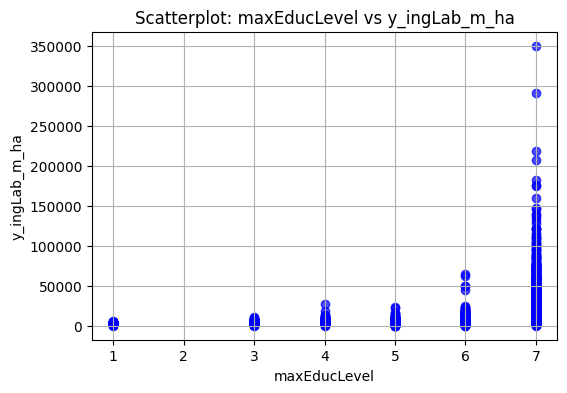

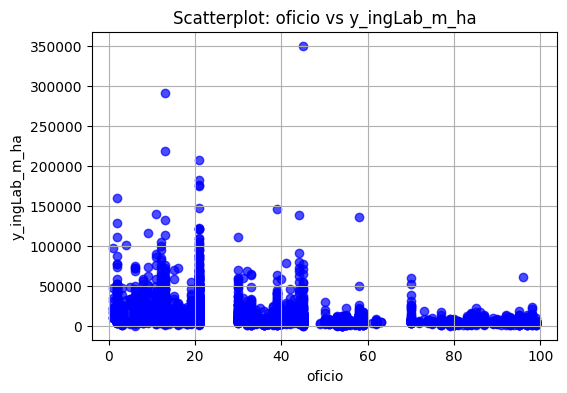

In [71]:
# Defino las variables independientes y la dependiente
variables_independientes = ["age", "informal", "relab", "p6426", "sex", "sizeFirm","maxEducLevel", "oficio"]

variable_dependiente = "y_ingLab_m_ha"

# Creo scatterplots entre hour_wage y cada variable independiente
for var in variables_independientes:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_limpio[var], df_limpio[variable_dependiente], alpha=0.7, color='b')
    plt.title(f"Scatterplot: {var} vs {variable_dependiente}")
    plt.xlabel(var)
    plt.ylabel(variable_dependiente)
    plt.grid(True)
    plt.show()


#Modelos

In [72]:
# Defino variables dependiente e independientes, el train set y el test set

X = df_limpio[["age", "informal", "relab", "p6426", "sex", "sizeFirm","maxEducLevel", "oficio"]]

y=df_limpio[["y_ingLab_m_ha"]]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                    )

X_train.head()


,age,informal,relab,p6426,sex,sizeFirm,maxEducLevel,oficio
7741,43,0,1,24,1,5,6.00,58
22475,32,0,2,144,1,5,7.00,58
13596,19,1,1,3,0,5,7.00,59
31707,29,0,1,7,0,5,6.00,55
15334,19,1,1,1,1,2,6.00,55


## Modelo 1: Sólo intercepto

In [73]:
# Defino el modelo
X0 = np.ones((len(y_train), 1))
model1=  LinearRegression().fit(X0,y_train)
model1.intercept_

array([8872.638145])

In [74]:
# Media estimada
y_train.mean()

,0
y_ingLab_m_ha,"8,872.64"


In [75]:
# Predicciones basadas en el modelo 1
X0_test = np.ones((len(y_test), 1))
y_hat_model1 = model1.predict(X0_test)

# Calculo el Mean Squared Error
mse1 = mean_squared_error(y_test, y_hat_model1)

print(f'Mean Squared Error: {mse1}')

Mean Squared Error: 170706548.33839813


## Modelo 2: Intercepto y máximo nivel educativo alcanzado

In [76]:
# Defino el modelo
model2=  LinearRegression().fit(X_train[['maxEducLevel']],y_train)
model2.coef_

array([[3026.0805349]])

In [77]:
# Predicciones basadas en el modelo 2
y_hat_model2 = model2.predict(X_test[['maxEducLevel']])

# Calculo el Mean Squared Error
mse2 = mean_squared_error(y_test, y_hat_model2)

print(f'Mean Squared Error: {mse2}')

Mean Squared Error: 158101108.2962417


## Modelo 3: Intercepto, máximo nivel educativo alcanzado, edad y sexo

In [78]:
# Defino el modelo
model3=  LinearRegression().fit(X_train[["age", "informal","sex","maxEducLevel"]],y_train)
model3.coef_

array([[  255.91014076, -3152.57752079,  1104.11418988,  3610.61464858]])

In [79]:
# Predicciones basadas en el modelo 3
y_hat_model3 = model3.predict(X_test[["age", "informal","sex","maxEducLevel"]])

# Calculo el Mean Squared Error
mse3 = mean_squared_error(y_test, y_hat_model3)

print(f'Mean Squared Error: {mse3}')

Mean Squared Error: 147855976.75942838


## Modelo 4: Intercepto, máximo nivel educativo alcanzado, edad, sexo, formalidad del empleo y tipo de relación laboral

In [80]:
# Defino el modelo
model4=  LinearRegression().fit(X_train[["age", "informal", "relab", "sex","maxEducLevel"]],y_train)
model4.coef_

array([[  253.5511288 , -3186.20252114,   285.88176382,  1162.31830052,
         3622.75230791]])

In [81]:
# Predicciones basadas en el modelo 4
y_hat_model4 = model4.predict(X_test[["age", "informal", "relab", "sex","maxEducLevel"]])

# Calculo el Mean Squared Error
mse4 = mean_squared_error(y_test, y_hat_model4)

print(f'Mean Squared Error: {mse4}')

Mean Squared Error: 147855617.61562744


## Modelo 5: Intercepto, máximo nivel educativo alcanzado, edad, sexo, formalidad del empleo, tipo de relación laboral, antiguedad, tamaño de la firma y oficio

In [82]:
# Defino el modelo
model5=  LinearRegression().fit(X_train[["age", "informal", "relab", "p6426", "sex", "sizeFirm","maxEducLevel", "oficio"]],y_train)
model5.coef_

array([[ 184.19918451, -188.85812824,  670.47392069,   19.00374292,
        2083.3637521 , 1188.41886764, 1915.36672216, -111.549421  ]])

In [83]:
# Predicciones basadas en el modelo 5
y_hat_model5 = model5.predict(X_test[["age", "informal", "relab", "p6426", "sex", "sizeFirm","maxEducLevel", "oficio"]])

# Calculate Mean Squared Error
mse5 = mean_squared_error(y_test, y_hat_model5)

print(f'Mean Squared Error: {mse5}')

Mean Squared Error: 138418984.16329354


## Agrego no-linealidades

In [84]:
poly_2 = PolynomialFeatures(degree=2)

In [85]:
poly_3 = PolynomialFeatures(degree=3)

## Modelo 6: Modelo 3 con interacciones y no linealidades de segundo grado

In [86]:
# Defino el modelo
X_train_poly_2 = poly_2.fit_transform(X_train[["age", "informal","sex","maxEducLevel"]])
model6 =  LinearRegression().fit(X_train_poly_2,y_train)

In [87]:
# Predicciones basadas en el modelo 6
X_test_poly_6 = poly_2.fit_transform(X_test[["age", "informal","sex","maxEducLevel"]])
y_hat_model6 = model6.predict(X_test_poly_6)

# Calculate Mean Squared Error
mse6 = mean_squared_error(y_test, y_hat_model6)

print(f'Mean Squared Error: {mse6}')

Mean Squared Error: 138959885.52011138


## Modelo 7: Modelo 3 con interacciones y no linealidades de tercer grado




In [88]:
# Defino el modelo
X_train_poly_3 = poly_3.fit_transform(X_train[["age", "informal","sex","maxEducLevel"]])
model7 =  LinearRegression().fit(X_train_poly_3,y_train)

In [89]:
# Predicciones basadas en el modelo 6
X_test_poly_7 = poly_3.fit_transform(X_test[["age", "informal","sex","maxEducLevel"]])
y_hat_model7 = model7.predict(X_test_poly_7)

# Calculate Mean Squared Error
mse7 = mean_squared_error(y_test, y_hat_model7)

print(f'Mean Squared Error: {mse7}')

Mean Squared Error: 135758679.0348077


## Modelo 8: Modelo 4 con interacciones y no linealidades de segundo grado

In [90]:
# Defino el modelo
X_train_poly_2 = poly_2.fit_transform(X_train[["age", "informal", "relab", "sex","maxEducLevel"]])
model8 =  LinearRegression().fit(X_train_poly_2,y_train)

In [91]:
# Predicciones basadas en el modelo 6
X_test_poly_8 = poly_2.fit_transform(X_test[["age", "informal", "relab", "sex","maxEducLevel"]])
y_hat_model8 = model8.predict(X_test_poly_8)

# Calculate Mean Squared Error
mse8 = mean_squared_error(y_test, y_hat_model8)

print(f'Mean Squared Error: {mse8}')

Mean Squared Error: 148502032.92460075


## Modelo 9: Modelo 4 con interacciones y no linealidades de tercer grado




In [92]:
# Defino el modelo
X_train_poly_3 = poly_3.fit_transform(X_train[["age", "informal", "relab", "sex","maxEducLevel"]])
model9 =  LinearRegression().fit(X_train_poly_3,y_train)

In [93]:
# Predicciones basadas en el modelo 6
X_test_poly_9 = poly_3.fit_transform(X_test[["age", "informal", "relab", "sex","maxEducLevel"]])
y_hat_model9 = model9.predict(X_test_poly_9)

# Calculate Mean Squared Error
mse9 = mean_squared_error(y_test, y_hat_model9)

print(f'Mean Squared Error: {mse9}')

Mean Squared Error: 170172051.97758788


## Modelo 10: Modelo 5 con interacciones y no linealidades de segundo grado

In [94]:
# Defino el modelo
X_train_poly_2 = poly_2.fit_transform(X_train[["age", "informal", "relab", "p6426", "sex", "sizeFirm","maxEducLevel"]])
model10 =  LinearRegression().fit(X_train_poly_2,y_train)

In [95]:
# Predicciones basadas en el modelo 6
X_test_poly_10 = poly_2.fit_transform(X_test[["age", "informal", "relab", "p6426", "sex", "sizeFirm","maxEducLevel"]])
y_hat_model10 = model10.predict(X_test_poly_10)

# Calculate Mean Squared Error
mse10 = mean_squared_error(y_test, y_hat_model10)

print(f'Mean Squared Error: {mse10}')

Mean Squared Error: 135608424.35868576


## Modelo 11: Modelo 5 con interacciones y no linealidades de tercer grado




In [96]:
# Defino el modelo
X_train_poly_3 = poly_3.fit_transform(X_train[["age", "informal", "relab", "p6426", "sex", "sizeFirm","maxEducLevel", "oficio"]])
model11 =  LinearRegression().fit(X_train_poly_3,y_train)

In [97]:
# Predicciones basadas en el modelo 6
X_test_poly_11 = poly_3.fit_transform(X_test[["age", "informal", "relab", "p6426", "sex", "sizeFirm","maxEducLevel", "oficio"]])
y_hat_model11 = model11.predict(X_test_poly_11)

# Calculate Mean Squared Error
mse11 = mean_squared_error(y_test, y_hat_model11)

print(f'Mean Squared Error: {mse11}')

Mean Squared Error: 497993622.5771446


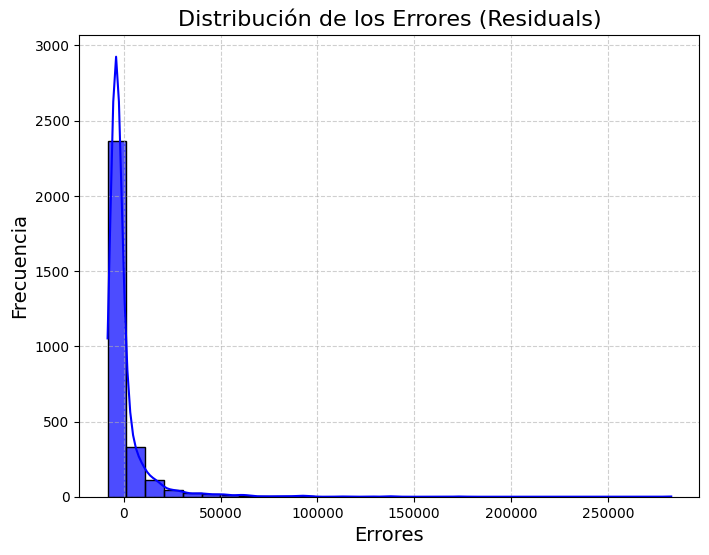

In [98]:
# Supongamos que tienes 'y_true' (valores reales) y 'y_pred' (predicciones del modelo)
# Calcular los errores
residuals = y_test["y_ingLab_m_ha"] - y_hat_model1.flatten()

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Graficar la distribución de los errores
sns.histplot(residuals, kde=True, color='blue', bins=30, alpha=0.7)
plt.title('Distribución de los Errores (Residuals)', fontsize=16)
plt.xlabel('Errores', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

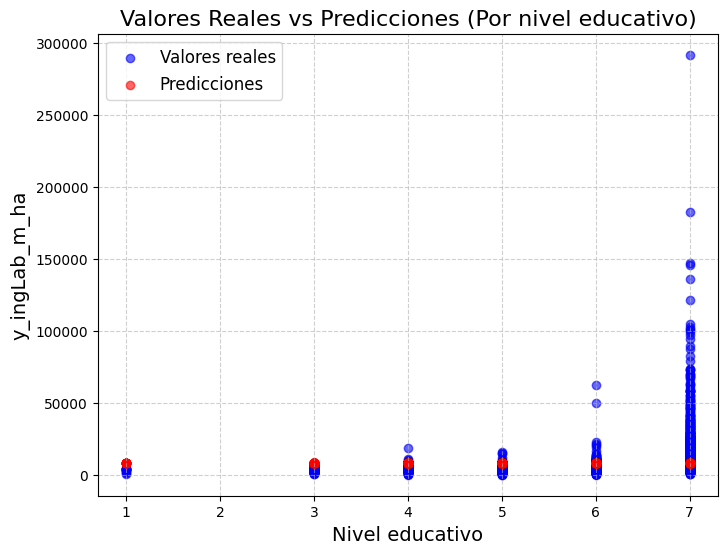

In [99]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Graficar los puntos reales (y_test frente a age)
plt.scatter(X_test["maxEducLevel"], y_test, color='blue', label='Valores reales', alpha=0.6)

# Graficar los valores predichos (y_hat frente a age)
plt.scatter(X_test["maxEducLevel"], y_hat_model1, color='red', label='Predicciones', alpha=0.6)

# Ajustar el gráfico
plt.title("Valores Reales vs Predicciones (Por nivel educativo)", fontsize=16)
plt.xlabel("Nivel educativo", fontsize=14)
plt.ylabel("y_ingLab_m_ha", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [100]:
from sklearn.model_selection import LeaveOneOut

# Definir el Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()

# Para model1 (solo el intercepto)
mse1_list = []

for train_index, test_index in loo.split(X_train):
    X_train_loo, X_test_loo = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_loo, y_test_loo = y_train.iloc[train_index], y_train.iloc[test_index]

    # Entrenar el modelo
    model1 = LinearRegression().fit(np.ones((len(X_train_loo), 1)), y_train_loo)

    # Predecir
    y_hat_model1 = model1.predict(np.ones((len(X_test_loo), 1)))

    # Calcular el MSE
    mse1_list.append(mean_squared_error(y_test_loo, y_hat_model1))

# Promedio de MSE para el modelo 1
mse1_loo = np.mean(mse1_list)
print(f'Mean Squared Error for Model 1 (LOOCV): {mse1_loo}')

# Para model2 (solo 'p6210')
mse2_list = []

for train_index, test_index in loo.split(X_train[['maxEducLevel']]):
    X_train_loo, X_test_loo = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_loo, y_test_loo = y_train.iloc[train_index], y_train.iloc[test_index]

    # Entrenar el modelo
    model2 = LinearRegression().fit(X_train_loo[['maxEducLevel']], y_train_loo)

    # Predecir
    y_hat_model2 = model2.predict(X_test_loo[['maxEducLevel']])

    # Calcular el MSE
    mse2_list.append(mean_squared_error(y_test_loo, y_hat_model2))

# Promedio de MSE para el modelo 2
mse2_loo = np.mean(mse2_list)
print(f'Mean Squared Error for Model 2 (LOOCV): {mse2_loo}')

# Para model3 (con todas las variables)
mse3_list = []

for train_index, test_index in loo.split(X_train[["age", "informal", "p6426", "sex", "sizeFirm", "maxEducLevel"]]):
    X_train_loo, X_test_loo = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_loo, y_test_loo = y_train.iloc[train_index], y_train.iloc[test_index]

    # Entrenar el modelo
    model3 = LinearRegression().fit(X_train_loo[["age", "informal", "p6426", "sex", "sizeFirm", "maxEducLevel"]], y_train_loo)

    # Predecir
    y_hat_model3 = model3.predict(X_test_loo[["age", "informal", "p6426", "sex", "sizeFirm", "maxEducLevel"]])

    # Calcular el MSE
    mse3_list.append(mean_squared_error(y_test_loo, y_hat_model3))

# Promedio de MSE para el modelo 3
mse3_loo = np.mean(mse3_list)
print(f'Mean Squared Error for Model 3 (LOOCV): {mse3_loo}')


Mean Squared Error for Model 1 (LOOCV): 165243863.57514822
Mean Squared Error for Model 2 (LOOCV): 154033746.18072647
Mean Squared Error for Model 3 (LOOCV): 139815133.17483696
